In [12]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv('loan_app_datamart_202409241521.csv')

# Step 2: Convert the datetime columns to date
df['iexceed_app_create_ts'] = pd.to_datetime(df['iexceed_app_create_ts']).dt.date
df['uw_disbursement_date'] = pd.to_datetime(df['uw_disbursement_date']).dt.date

# # Step 3: Define the filter date (August 1, 2023)
# filter_date = pd.to_datetime('2022-06-01').date()

# # Step 4: Filter the data where both columns are greater than or equal to August 1, 2023
# df = df[df['uw_disbursement_date'] >= filter_date]

# Step 3: Group by 'iexceed_app_create_ts' and count 'application_id'
grouped_by_create_date = df.groupby(['iexceed_app_create_ts'])['application_id'].count().reset_index()
grouped_by_create_date.rename(columns={'application_id': 'application_count'}, inplace=True)

# Step 4: Group by 'uw_disbursement_date' and count 'application_id'
grouped_by_disbursement_date = df.groupby(['uw_disbursement_date'])['application_id'].count().reset_index()
grouped_by_disbursement_date.rename(columns={'application_id': 'application_count'}, inplace=True)

# Step 5: Display the two DataFrames
print("Grouped by iexceed_app_create_ts:")
print(grouped_by_create_date)

print("\nGrouped by uw_disbursement_date:")
print(grouped_by_disbursement_date)

Grouped by iexceed_app_create_ts:
    iexceed_app_create_ts  application_count
0              2023-02-21                  2
1              2023-02-23                  1
2              2023-02-28                  1
3              2023-03-01                  2
4              2023-03-02                  1
..                    ...                ...
561            2024-09-20                961
562            2024-09-21                776
563            2024-09-22                675
564            2024-09-23               1048
565            2024-09-24                427

[566 rows x 2 columns]

Grouped by uw_disbursement_date:
    uw_disbursement_date  application_count
0             2023-10-12                  2
1             2023-10-14                  1
2             2023-10-16                 81
3             2023-10-17                 40
4             2023-10-18                  8
..                   ...                ...
337           2024-09-18                 10
338           20

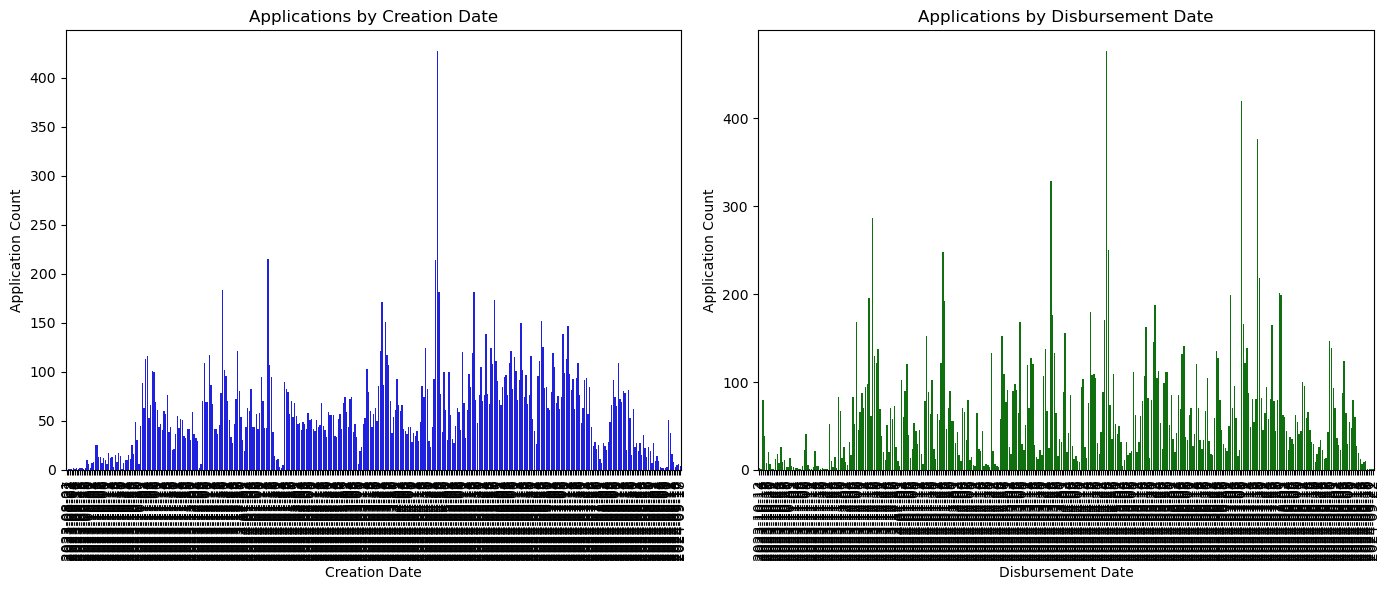

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the plot
plt.figure(figsize=(14, 6))

# Plot for iexceed_app_create_ts
plt.subplot(1, 2, 1)
sns.barplot(x='iexceed_app_create_ts', y='application_count', data=grouped_by_create_date, color='blue')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Applications by Creation Date')
plt.xlabel('Creation Date')
plt.ylabel('Application Count')

# Plot for uw_disbursement_date
plt.subplot(1, 2, 2)
sns.barplot(x='uw_disbursement_date', y='application_count', data=grouped_by_disbursement_date, color='green')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Applications by Disbursement Date')
plt.xlabel('Disbursement Date')
plt.ylabel('Application Count')

# Adjust layout for readability
plt.tight_layout()

# Show the plots
plt.show()

In [13]:
with pd.ExcelWriter('grouped_loan_applications.xlsx') as writer:
    grouped_by_create_date.to_excel(writer, sheet_name='Grouped by Create Date', index=False)
    grouped_by_disbursement_date.to_excel(writer, sheet_name='Grouped by Disbursement Date', index=False)
